# TASK 1
**Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.**
Sample dataset used:  https://data.worldbank.org/indicator/SP.POP.TOTL

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

indicators = {
    "0-14": {"percent": "SP.POP.0014.TO.ZS", "count": "SP.POP.0014.TO"},
    "15-64": {"percent": "SP.POP.1564.TO.ZS", "count": "SP.POP.1564.TO"},
    "65+": {"percent": "SP.POP.65UP.TO.ZS", "count": "SP.POP.65UP.TO"},
}
def fetchdata(year, age_code):
    url = f"http://api.worldbank.org/v2/country/all/indicator/{age_code}?format=json&date={year}&per_page=300"
    response = requests.get(url)
    data = response.json()
    entries = data[1]
    result = []
    for entry in entries:
        country = entry['country']['value']
        value = entry['value']
        if value is not None and country != 'World':
            result.append((country, value))
    df = pd.DataFrame(result, columns=['Country', 'Value'])
    return df

In [2]:
def plot_top_n(df, title, n=5, color="skyblue"):
    df_sorted = df.sort_values(by="Value", ascending=False).head(n)
    plt.figure(figsize=(10, 5))
    plt.bar(df_sorted["Country"], df_sorted["Value"], color=color)
    plt.title(title)
    plt.ylabel("Percentage" if "percentage" in title.lower() else "Population")
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--',alpha=0.4)
    plt.show()
    return df_sorted

In [3]:
def plot_bottom_n(df, title, n=5, color="salmon"):
    df_sorted = df.sort_values(by="Value", ascending=True).head(n)
    plt.figure(figsize=(10, 5))
    plt.bar(df_sorted["Country"], df_sorted["Value"], color=color)
    plt.title(title)
    plt.ylabel("Percentage" if "percentage" in title.lower() else "Population")
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--' ,alpha=0.4)
    plt.show()

In [4]:
def plot_comparison(df_2022, df_2023, group, countries):
    df_2022_filtered = df_2022[df_2022['Country'].isin(countries)]
    df_2023_filtered = df_2023[df_2023['Country'].isin(countries)]
    df_comparison = pd.merge(df_2022_filtered, df_2023_filtered, on='Country', suffixes=('_2022', '_2023'))
    plt.figure(figsize=(10, 6))
    bar_height = 0.35
    index = range(len(df_comparison))
    plt.barh([i - bar_height / 2 for i in index], df_comparison['Value_2022'], bar_height, label="2022", color="skyblue")
    plt.barh([i + bar_height / 2 for i in index], df_comparison['Value_2023'], bar_height, label="2023", color="slategrey")
    plt.ylabel("Country")
    plt.xlabel("Percentage of Population")
    plt.title(f"Comparison of Population Aged {group}: 2022 vs 2023")
    plt.yticks(index, df_comparison['Country'])
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

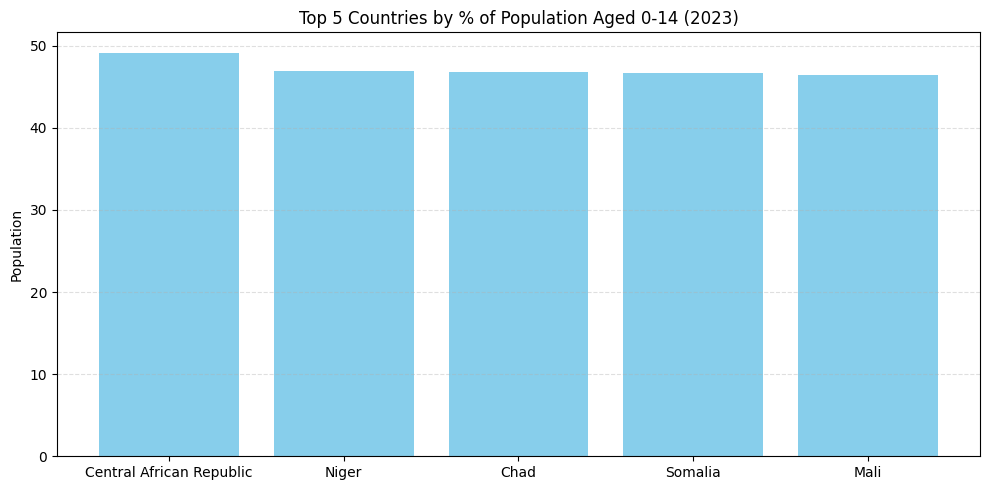

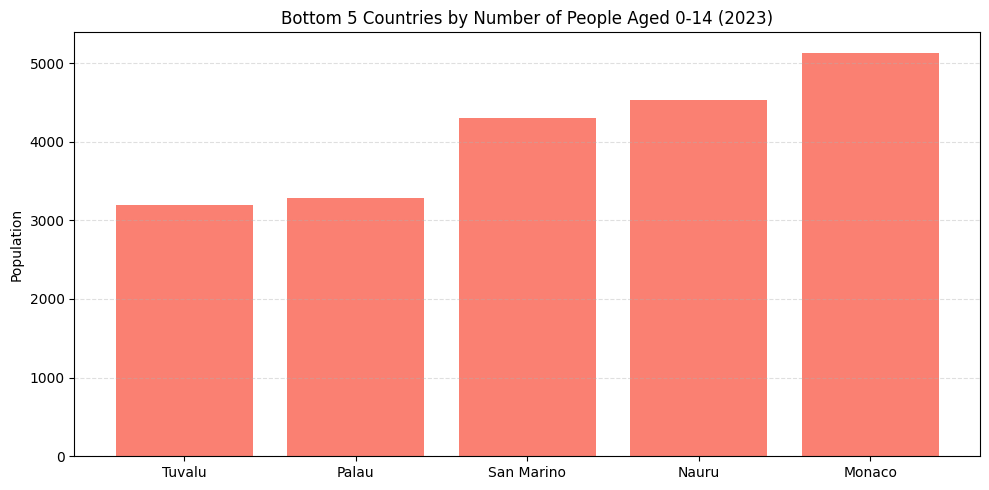

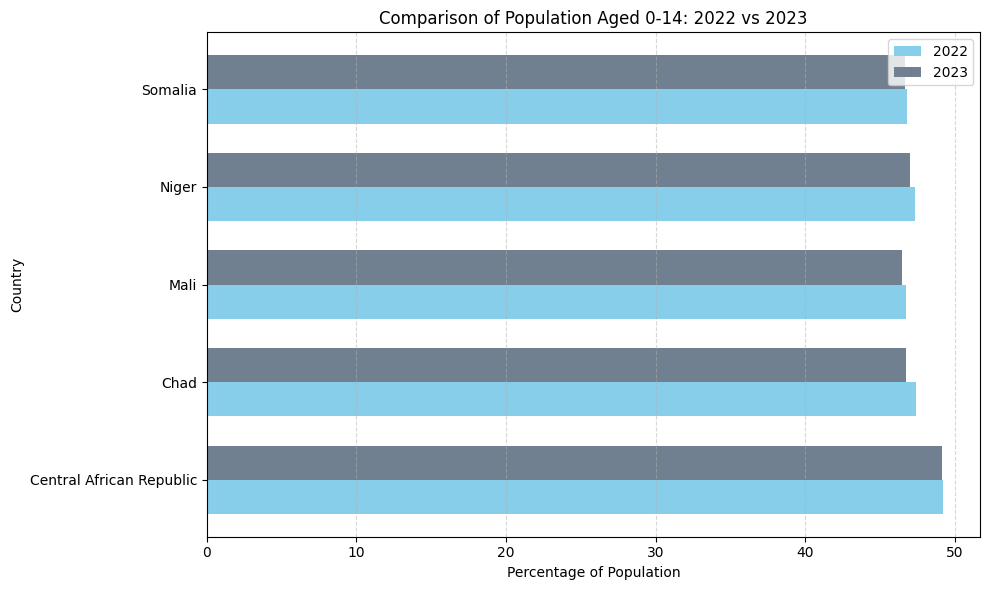

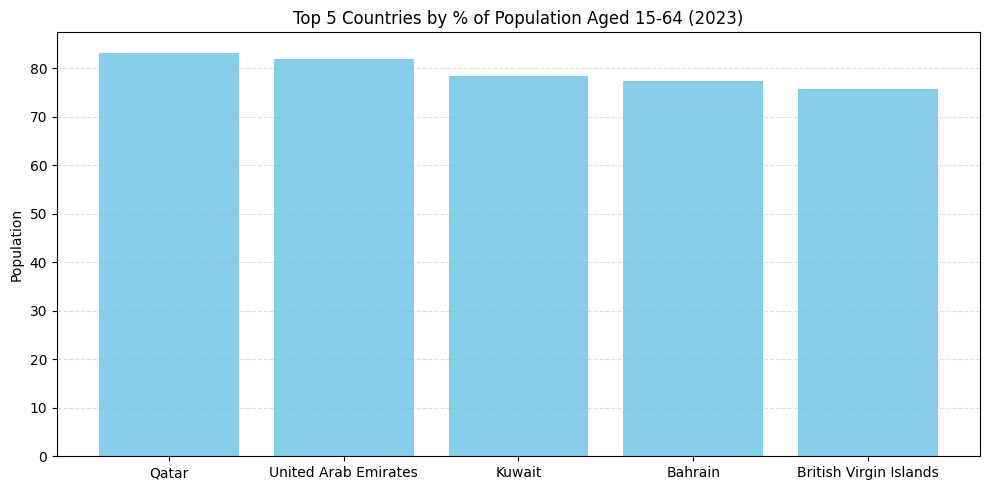

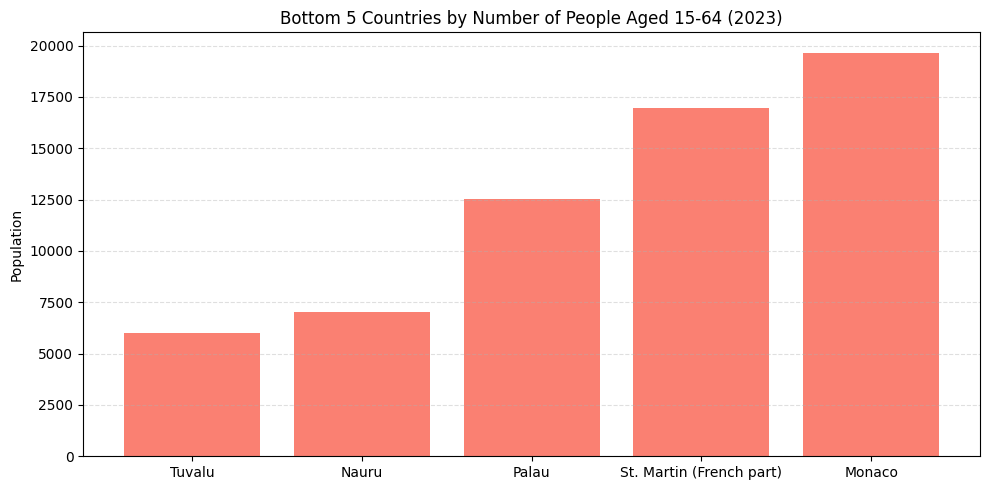

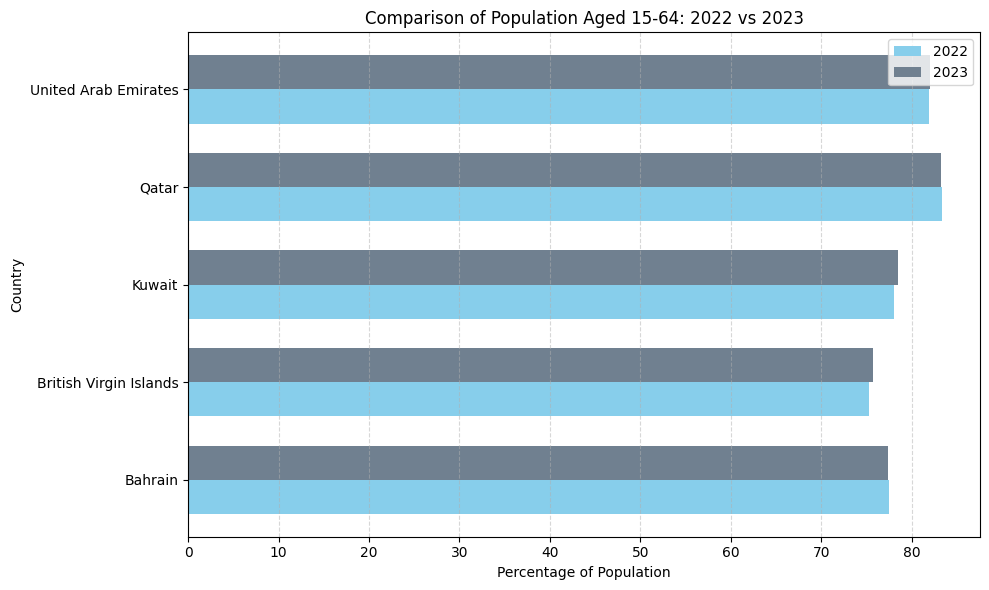

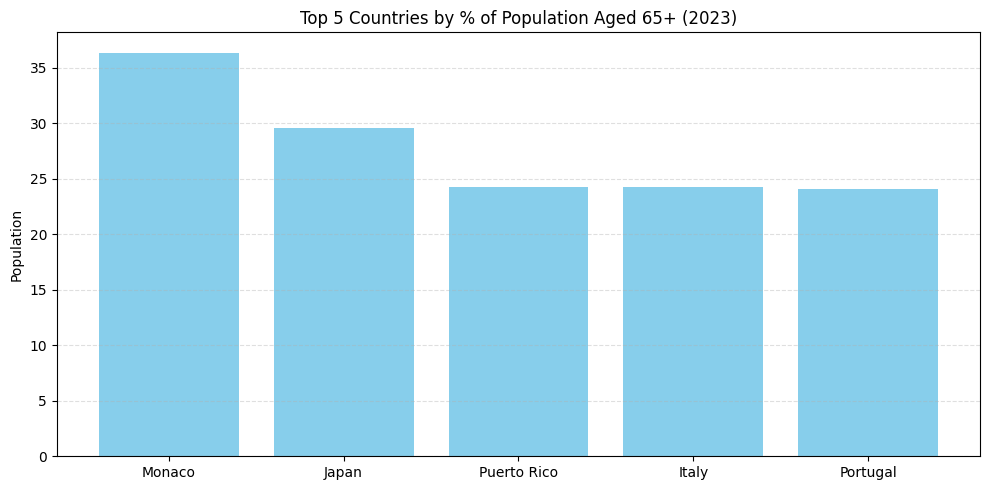

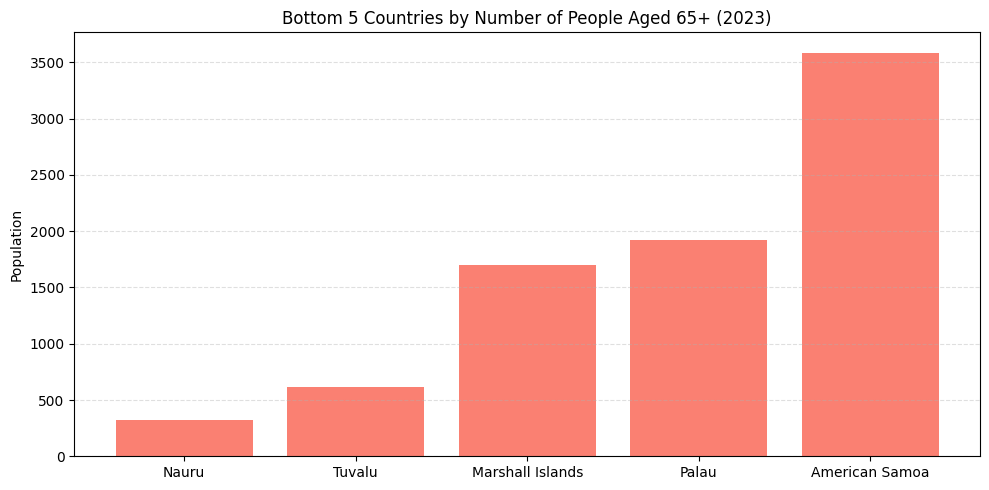

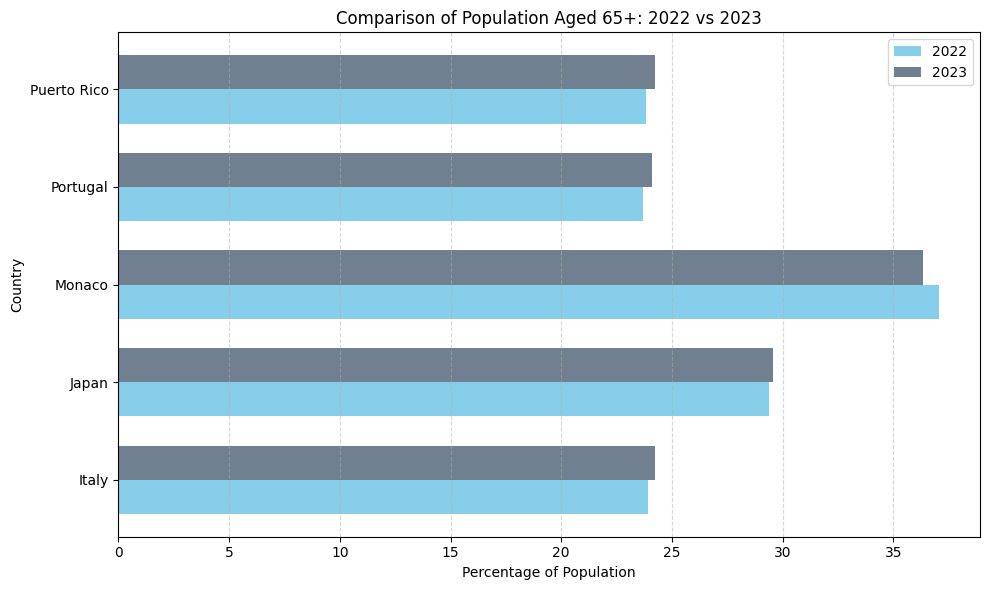

In [5]:
for group in indicators:
    # Top 5 Countries population by percentage for 2023
    df_percent_2023 = fetchdata(2023, indicators[group]["percent"])
    top5_df = plot_top_n(df_percent_2023, f"Top 5 Countries by % of Population Aged {group} (2023)", n=5, color="skyblue")

    # Bottom 5 Countries population by count for 2023
    df_count_2023 = fetchdata(2023, indicators[group]["count"])
    plot_bottom_n(df_count_2023, f"Bottom 5 Countries by Number of People Aged {group} (2023)", n=5, color="salmon")

    # Comparison between 2022 and 2023 for top 5 countries
    df_percent_2022 = fetchdata(2022, indicators[group]["percent"])
    plot_comparison(df_percent_2022, df_percent_2023, group, top5_df["Country"].tolist())